### some ideas
1. Using two coordinates, we can define a vector pointing from the reflection point to the previous point.
2. Similarly, define a normal vector at the intersection point.
3. Dot product allows us to find the angle between these two vectors, and double of this angle is the angle between the incoming beam and the reflected beam.
4. Next, we use the rotation matrix to rotate the beam to get the slope of the reflected beam.
5. With the linear function describing the reflected beam, we can find the next intersecting point.
6. Repeat!


In [12]:
import math
import numpy as np
from matplotlib import pyplot
%matplotlib notebook 

In [13]:
# plot an ellipse
def plotEllipse():
    xMin = -5
    xMax = 5
    dx = 0.01
    Nx = int((xMax-xMin)/dx) + 1
    x = np.linspace(xMin, xMax, Nx)

    yPos = np.sqrt(100 - 4*x**2)
    yNeg = -np.sqrt(100 - 4*x**2)
    yMin = min(yNeg)
    yMax = max(yPos)
    
    fig = pyplot.figure()
    pyplot.axis([1.1*xMin, 1.1*xMax, 1.1*yMin, 1.1*yMax])
    pyplot.plot(x, yPos, color='k')
    pyplot.plot(x, yNeg, color='k')

In [14]:
# 1st quadrant
def firstQuadrant(x1, y1, x2, y2):
    
    beam = np.array([x1-x2, y1-y2])
    normal = np.array([-1, -1*-1/(-4*x2/y2)])
    x1 = x2
    y1 = y2
    beamMag = np.linalg.norm(beam)
    normalMag = np.linalg.norm(normal)
    theta = np.arccos(beam.dot(normal) / (beamMag*normalMag))
    angle = 2*theta
    mBeam = (np.sin(angle)*beam[0]+np.cos(angle)*beam[1]) / (np.cos(angle)*beam[0]-np.sin(angle)*beam[1])
    b = y2 - mBeam*x2
    
    # since there are two intersecting points, we can use the quadratic formula to find the roots.
    beta = np.sqrt((mBeam*b)**2 - (4+mBeam**2)*(b**2-100))
    z1 = (-mBeam*b + beta)/(4+mBeam**2)
    z2 = (-mBeam*b - beta)/(4+mBeam**2)
    if abs(z1-x2) > abs(z2-x2):
        x2 = z1
    else:
        x2 = z2
    y2 = mBeam*x2 + b
    
    return x1, y1, x2, y2

In [15]:
# 2nd quadrant
def secondQuadrant(x1, y1, x2, y2):
    
    beam = np.array([x1-x2, y1-y2])
    normal = np.array([1, -1/(-4*x2/y2)])
    x1 = x2
    y1 = y2
    beamMag = np.linalg.norm(beam)
    normalMag = np.linalg.norm(normal)
    theta = np.arccos(beam.dot(normal) / (beamMag*normalMag))
    angle = 2*theta
    mBeam = (np.sin(angle)*beam[0]+np.cos(angle)*beam[1]) / (np.cos(angle)*beam[0]-np.sin(angle)*beam[1])
    b = y2 - mBeam*x2
    beta = np.sqrt((mBeam*b)**2 - (4+mBeam**2)*(b**2-100))
    z1 = (-mBeam*b + beta)/(4+mBeam**2)
    z2 = (-mBeam*b - beta)/(4+mBeam**2)
    if abs(z1-x2) > abs(z2-x2):
        x2 = z1
    else:
        x2 = z2
    y2 = mBeam*x2 + b
    
    return x1, y1, x2, y2

In [16]:
# 3rd quadrant
def thirdQuadrant(x1, y1, x2, y2):
    
    beam = np.array([x1-x2, y1-y2])
    normal = np.array([1, -1/(-4*x2/y2)])
    x1 = x2
    y1 = y2
    beamMag = np.linalg.norm(beam)
    normalMag = np.linalg.norm(normal)
    theta = np.arccos(beam.dot(normal) / (beamMag*normalMag))
    angle = 2*theta
    mBeam = (np.sin(angle)*beam[0]+np.cos(angle)*beam[1]) / (np.cos(angle)*beam[0]-np.sin(angle)*beam[1])
    b = y2 - mBeam*x2
    beta = np.sqrt((mBeam*b)**2 - (4+mBeam**2)*(b**2-100))
    z1 = (-mBeam*b + beta)/(4+mBeam**2)
    z2 = (-mBeam*b - beta)/(4+mBeam**2)
    if abs(z1-x2) > abs(z2-x2):
        x2 = z1
    else:
        x2 = z2
    y2 = mBeam*x2 + b
    
    return x1, y1, x2, y2

In [17]:
# 4th quadrant
def forthQuadrant(x1, y1, x2, y2):
    
    beam = np.array([x1-x2, y1-y2])
    normal = np.array([-1, -1*-1/(-4*x2/y2)])
    x1 = x2
    y1 = y2
    beamMag = np.linalg.norm(beam)
    normalMag = np.linalg.norm(normal)
    theta = np.arccos(beam.dot(normal) / (beamMag*normalMag))
    angle = 2*theta
    mBeam = (np.sin(angle)*beam[0]+np.cos(angle)*beam[1]) / (np.cos(angle)*beam[0]-np.sin(angle)*beam[1])
    b = y2 - mBeam*x2
    beta = np.sqrt((mBeam*b)**2 - (4+mBeam**2)*(b**2-100))
    z1 = (-mBeam*b + beta)/(4+mBeam**2)
    z2 = (-mBeam*b - beta)/(4+mBeam**2)
    if abs(z1-x2) > abs(z2-x2):
        x2 = z1
    else:
        x2 = z2
    y2 = mBeam*x2 + b
    
    return x1, y1, x2, y2

In [18]:
def whiteCell(x1, y1, x2, y2):
    
    if x2 > 0 and y2 > 0:
        x1, y1, x2, y2 = firstQuadrant(x1, y1, x2, y2)
    elif x2 < 0 and y2 > 0:
        x1, y1, x2, y2 = secondQuadrant(x1, y1, x2, y2)
    elif x2 < 0 and y2 < 0:
        x1, y1, x2, y2 = thirdQuadrant(x1, y1, x2, y2)
    elif x2 > 0 and y2 < 0:
        x1, y1, x2, y2 = forthQuadrant(x1, y1, x2, y2)
    
    return x1, y1, x2, y2

In [19]:
# Plot beams
def plotBeams(x1, y1, x2, y2):
    
    return pyplot.plot([x1, x2], [y1, y2], color='m')

In [20]:
def plotReflection():
    
    opening = 0.33
    reflections = 15
    
    x1 = 0
    y1 = 10.1
    x2 = 1.4
    y2 = -9.6
    
    plotEllipse()
    plotBeams(x1, y1, x2, y2)
        
    n = 1
    while n < reflections:
        x1, y1, x2, y2 = whiteCell(x1, y1, x2, y2)
        n += 1
        n += 1
        
        plotBeams(x1, y1, x2, y2)    
    
    return

In [21]:
def countReflection():
    
    opening = 0.01
    reflections = 15
    
    x1 = 0
    y1 = 10.1
    x2 = 1.4
    y2 = -9.6
    
    count = 0
    flag = False
    while flag == False:
        if x2 > -opening and x2 < opening and y2 > 0:
            break
        x1, y1, x2, y2 = whiteCell(x1, y1, x2, y2)
        count += 1
    
    return count, reflections

<IPython.core.display.Javascript object>


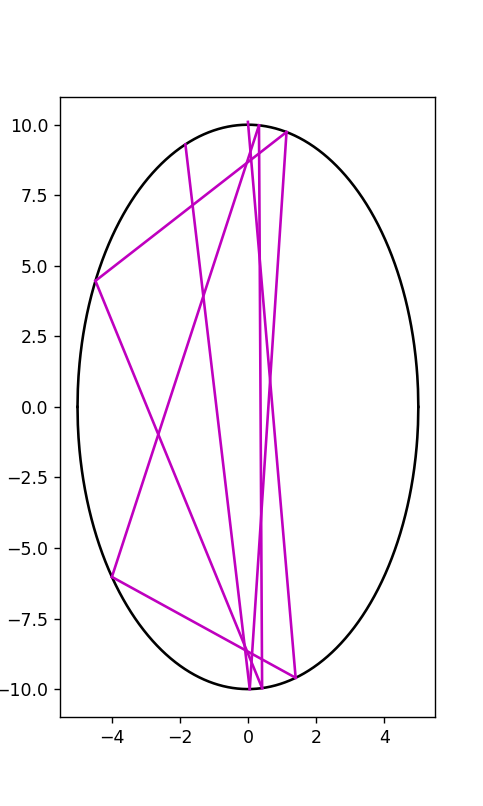

plot showing 15 reflections.
The beam reflects 354 times before it exits.


In [22]:
plotReflection()
count, reflections = countReflection()
print('plot showing', reflections, 'reflections.')
print('The beam reflects', count,'times before it exits.')